# Objective

You are required to demonstrate your ability to manipulate data using Python, including filtering,
looping, and conditional statements. The task involves creating a data frame, adding the data,
performing exploratory data analysis (EDA), and applying additional operations. 

## 1. Creating a DataFrame:

#### 1. importing librarys

In [1]:
import requests
import pandas as pd

#### 2. Define the API endpoint URL

In [2]:
# Define your API key and URL
api_key = '93P64L33YRQ8RFDN'
url = 'https://www.alphavantage.co/query'
params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'BTCUSD',  # Use BTCUSD for Bitcoin data
    'apikey': api_key
}

response = requests.get(url, params=params)


#### 3. Make the API request

In [5]:
# Check if the response was successful
if response.status_code == 200:
    # Convert the response data to JSON format
    data = response.json()

    # Print the data to see the structure (for debugging purposes)
    print("Response Data:", data)
    
    # Check if the 'Time Series (Daily)' key is present in the data
    if 'Time Series (Daily)' in data:
        # Get the daily time series data
        time_series = data['Time Series (Daily)']
        
        # Convert the time series data to a DataFrame
        df = pd.DataFrame.from_dict(time_series, orient='index')
        
        # Rename the columns to simpler names
        df = df.rename(columns={
            '1. open': 'Open',
            '2. high': 'High',
            '3. low': 'Low',
            '4. close': 'Close',
            '5. volume': 'Volume'
        })
        
        # Reset the index to make 'Date' a column and rename it
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'Date'}, inplace=True)

        # Convert 'Date' to datetime format
        df['Date'] = pd.to_datetime(df['Date'], unit='ms')

        # Convert all numeric columns to numeric types
        df = df.apply(pd.to_numeric, errors='ignore')

        # Save the DataFrame to a CSV file
        df.to_csv('bitcoin_dataset.csv', index=False)  # Save without index to avoid duplicate Date column
        print("Data saved to 'bitcoin_dataset.csv'")
        
        # Print the first few rows of the DataFrame
        print("DataFrame Preview:")
        print(df.head())
    else:
        print("Error: 'Time Series (Daily)' data not found in response.")
else:
    print(f"Failed to retrieve data: {response.status_code}")


Response Data: {'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'BTCUSD', '3. Last Refreshed': '2024-09-09', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2024-09-09': {'1. open': '54885.6735', '2. high': '55585.8705', '3. low': '54577.1040', '4. close': '55277.4629', '5. volume': '3922'}, '2024-09-08': {'1. open': '54171.2551', '2. high': '55328.6738', '3. low': '53630.8434', '4. close': '54889.4399', '5. volume': '6472'}, '2024-09-07': {'1. open': '53986.9493', '2. high': '54892.5449', '3. low': '53775.0980', '4. close': '54186.2042', '5. volume': '6160'}, '2024-09-06': {'1. open': '56174.8742', '2. high': '57004.0633', '3. low': '52555.1342', '4. close': '53967.3797', '5. volume': '26159'}, '2024-09-05': {'1. open': '57989.7989', '2. high': '58337.9216', '3. low': '55647.8231', '4. close': '56178.0057', '5. volume': '17146'}, '2024-09-04': {'1. open': '57488.1125', '2. high': '58539.4158', '3. l

ValueError: non convertible value 2024-09-09 with the unit 'ms', at position 0

In [7]:
# Display the first few rows of the DataFrame
df.head()

,Date,Open,High,Low,Close,Volume
0,2024-09-09,54885.6735,55585.8705,54577.1040,55277.4629,3922
1,2024-09-08,54171.2551,55328.6738,53630.8434,54889.4399,6472
2,2024-09-07,53986.9493,54892.5449,53775.0980,54186.2042,6160
3,2024-09-06,56174.8742,57004.0633,52555.1342,53967.3797,26159
4,2024-09-05,57989.7989,58337.9216,55647.8231,56178.0057,17146


In [8]:
# Sort the DataFrame by the date
df = df.sort_index()

# Reset the index so that the Date is a column
df = df.reset_index().rename(columns={'index': 'Date'})

In [10]:
df.head()


,Date,Date,Open,High,Low,Close,Volume
0,0,2024-09-09,54885.6735,55585.8705,54577.1040,55277.4629,3922
1,1,2024-09-08,54171.2551,55328.6738,53630.8434,54889.4399,6472
2,2,2024-09-07,53986.9493,54892.5449,53775.0980,54186.2042,6160
3,3,2024-09-06,56174.8742,57004.0633,52555.1342,53967.3797,26159
4,4,2024-09-05,57989.7989,58337.9216,55647.8231,56178.0057,17146


In [13]:
#dataset Contains data for 100 days and 6 columns 
#name : Date, Date, Open, High, Low, Close, Volume.
df.shape

(100, 7)

#### this dataset contains 6 column
#### we need one more that is market cap
#### extracting market cap from CoinGecko

In [14]:

# Define the CoinGecko endpoint and parameters
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart'
params = {
    'vs_currency': 'usd',
    'days': '100',
    'interval': 'daily'
}

# Make the API request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    # Check if 'market_caps' is in the response
    if 'market_caps' in data:
        # Extract 'market_caps' data
        market_caps = data['market_caps']
        
        # Convert to DataFrame
        market_cap_df = pd.DataFrame(market_caps, columns=['Date', 'Market Cap'])
        
        # Convert 'Date' to datetime
        market_cap_df['Date'] = pd.to_datetime(market_cap_df['Date'], unit='ms')
        
        # Save the DataFrame to a CSV file
        market_cap_df.to_csv('market_cap_data.csv', index=False)
        print("Market Cap data saved to 'market_cap_data.csv'")
    else:
        print("Error: 'market_caps' not found in response.")
else:
    print(f"Failed to retrieve data: {response.status_code}")


Market Cap data saved to 'market_cap_data.csv'


#### Merge the DataFrames

In [15]:

    # Load OHLC and volume data from 'bitcoin_data.csv'
    ohlc_df = pd.read_csv('bitcoin_dataset.csv')
    
    # Load Market Cap data from 'market_cap_data.csv'
    market_cap_df = pd.read_csv('market_cap_data.csv')

    # Convert 'Date' columns to datetime format to ensure matching works correctly
    ohlc_df['Date'] = pd.to_datetime(ohlc_df['Date'])
    market_cap_df['Date'] = pd.to_datetime(market_cap_df['Date'])

    # Merge the two DataFrames on 'Date', matching rows with the same date
    merged_df = pd.merge(ohlc_df, market_cap_df, on='Date', how='left')

    # Save the merged DataFrame to a new CSV file
    merged_df.to_csv('bitcoin_dataset.csv', index=False)
    print("Merged data saved to 'bitcoin_dataset.csv'")

    #Print the first few rows of the merged DataFrame
    print("\nSample of merged data:")
    print(merged_df.head())


Merged data saved to 'bitcoin_dataset.csv'

Sample of merged data:
        Date        Open        High         Low       Close  Volume  \
0 2024-09-09  54885.6735  55585.8705  54577.1040  55277.4629    3922   
1 2024-09-08  54171.2551  55328.6738  53630.8434  54889.4399    6472   
2 2024-09-07  53986.9493  54892.5449  53775.0980  54186.2042    6160   
3 2024-09-06  56174.8742  57004.0633  52555.1342  53967.3797   26159   
4 2024-09-05  57989.7989  58337.9216  55647.8231  56178.0057   17146   

     Market Cap  
0  1.085390e+12  
1  1.068955e+12  
2  1.065462e+12  
3  1.109213e+12  
4  1.144983e+12  


## 3. Exploratory Data Analysis (EDA):

#### 1. Import Libraries

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import re 

#### 2. Load Data

In [17]:
# Load the data from the CSV file
df = pd.read_csv('bitcoin_dataset.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        100 non-null    object 
 1   Open        100 non-null    float64
 2   High        100 non-null    float64
 3   Low         100 non-null    float64
 4   Close       100 non-null    float64
 5   Volume      100 non-null    int64  
 6   Market Cap  100 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB


### 3. Convert 'Date' column to datetime format 


In [19]:
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        100 non-null    datetime64[ns]
 1   Open        100 non-null    float64       
 2   High        100 non-null    float64       
 3   Low         100 non-null    float64       
 4   Close       100 non-null    float64       
 5   Volume      100 non-null    int64         
 6   Market Cap  100 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 5.6 KB


In [20]:
#DataSet head
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-09-09,54885.6735,55585.8705,54577.1040,55277.4629,3922,1.085390e+12
1,2024-09-08,54171.2551,55328.6738,53630.8434,54889.4399,6472,1.068955e+12
2,2024-09-07,53986.9493,54892.5449,53775.0980,54186.2042,6160,1.065462e+12
3,2024-09-06,56174.8742,57004.0633,52555.1342,53967.3797,26159,1.109213e+12
4,2024-09-05,57989.7989,58337.9216,55647.8231,56178.0057,17146,1.144983e+12


In [21]:
df['Date'] = pd.to_datetime(df['Date'])


In [22]:
print(df['Date'].head())
print(df.dtypes)  # To verify that the Date column is now of type datetime.date


0   2024-09-09
1   2024-09-08
2   2024-09-07
3   2024-09-06
4   2024-09-05
Name: Date, dtype: datetime64[ns]
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                 int64
Market Cap           float64
dtype: object


#### 4. Descriptive Statistics

In [23]:
# Display descriptive statistics
df.describe()

,Date,Open,High,Low,Close,Volume,Market Cap
count,100,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,2024-07-21 12:00:00,62328.267646,63488.310220,61004.373241,62203.273210,14301.420000,1.229632e+12
min,2024-06-02 00:00:00,53986.949300,54892.544900,49119.829700,53967.379700,1504.000000,1.064889e+12
25%,2024-06-26 18:00:00,58971.345675,59883.189150,57601.455450,58850.029000,7319.250000,1.163888e+12
50%,2024-07-21 12:00:00,61666.446300,62851.899250,60344.452000,61529.937850,14303.500000,1.215933e+12
75%,2024-08-15 06:00:00,66046.642600,66945.219550,65015.989650,65958.348925,18347.250000,1.302555e+12
max,2024-09-09 00:00:00,71119.587700,71963.232200,70253.141700,71118.951700,81896.000000,1.400298e+12
std,NaN,4417.006129,4234.662782,4629.375406,4438.826459,9959.793696,8.658242e+10


#### 5.Time Series Plot

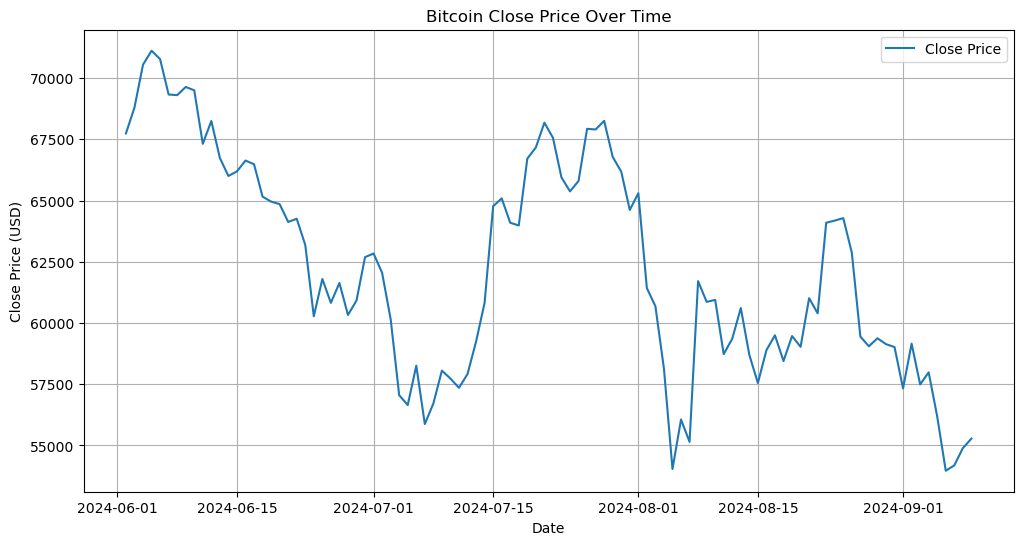

In [24]:
# Plot the time series of the Close price
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


#### 6. Distribution of Volume

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


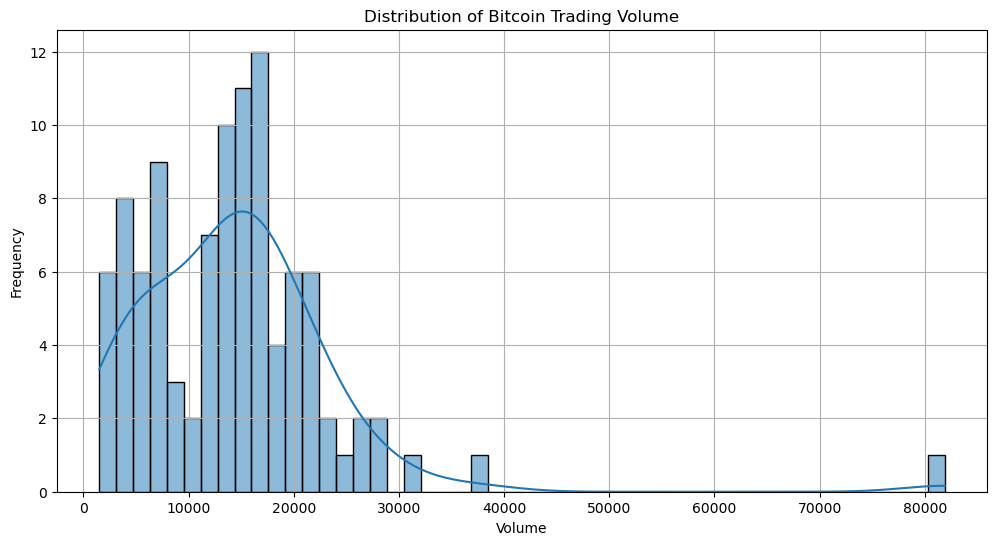

In [25]:
# Plot the distribution of the Volume
plt.figure(figsize=(12, 6))
sns.histplot(df['Volume'], bins=50, kde=True)
plt.title('Distribution of Bitcoin Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [26]:
#### 7. Pair Plot

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

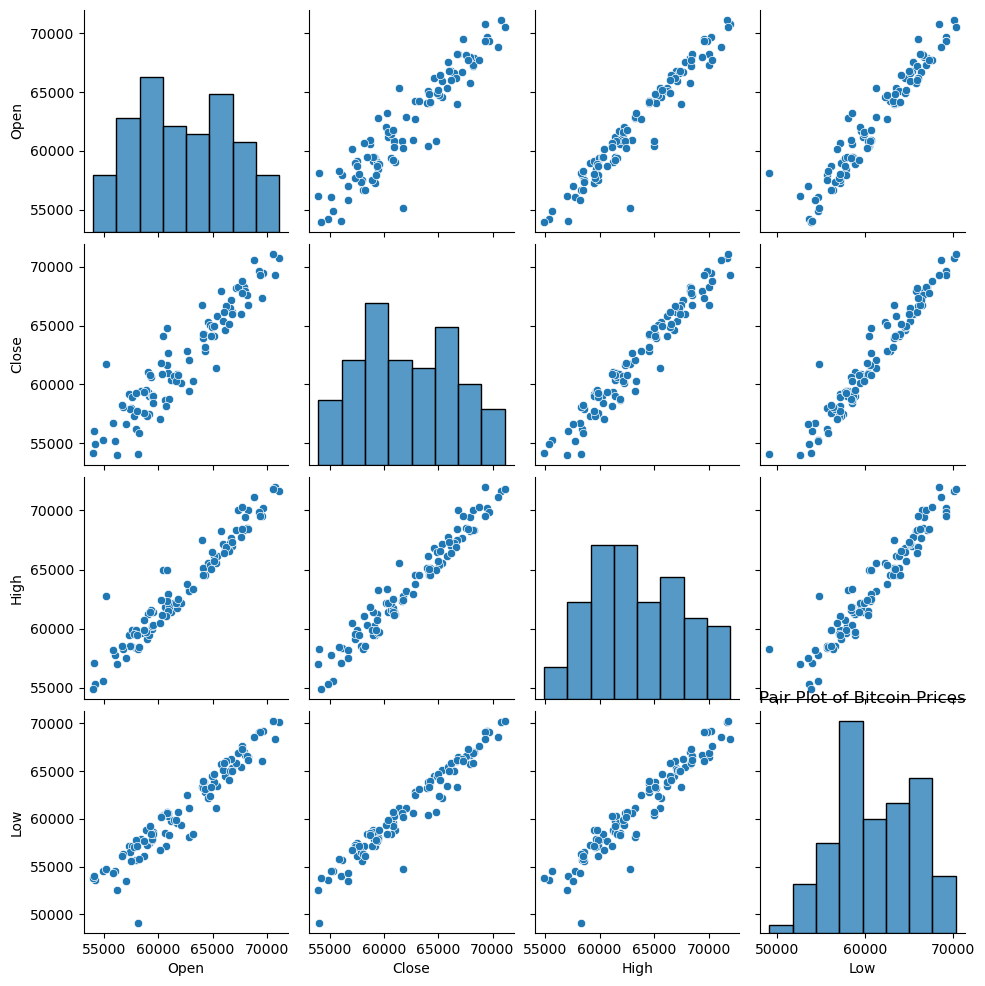

In [27]:
# Select the relevant columns
subset_df = df[['Open', 'Close', 'High', 'Low']]

# Plot the pair plot
sns.pairplot(subset_df)
plt.title('Pair Plot of Bitcoin Prices')
plt.show()


#### 8. Correlation Matrix

In [28]:
 # Calculate the correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Display the correlation matrix
correlation_matrix


,Open,High,Low,Close,Volume
Open,1.000000,0.967867,0.956684,0.933674,-0.140239
High,0.967867,1.000000,0.957168,0.975004,-0.107781
Low,0.956684,0.957168,1.000000,0.970596,-0.338306
Close,0.933674,0.975004,0.970596,1.000000,-0.211811
Volume,-0.140239,-0.107781,-0.338306,-0.211811,1.000000


## 4. Data Filtering for Bitcoin Data

####  Import Libraries

In [29]:
import numpy as np
import seaborn as sns

In [30]:
# Load your DataFrame from a CSV file
df = pd.read_csv('bitcoin_dataset.csv')
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-09-09,54885.6735,55585.8705,54577.1040,55277.4629,3922,1.085390e+12
1,2024-09-08,54171.2551,55328.6738,53630.8434,54889.4399,6472,1.068955e+12
2,2024-09-07,53986.9493,54892.5449,53775.0980,54186.2042,6160,1.065462e+12
3,2024-09-06,56174.8742,57004.0633,52555.1342,53967.3797,26159,1.109213e+12
4,2024-09-05,57989.7989,58337.9216,55647.8231,56178.0057,17146,1.144983e+12
...,...,...,...,...,...,...,...
95,2024-06-06,71119.5877,71646.0717,70099.6328,70775.8622,11287,1.400298e+12
96,2024-06-05,70546.7904,71787.9088,70253.1417,71118.9517,14281,1.390853e+12
97,2024-06-04,68794.7811,71101.5573,68548.3679,70547.8996,22694,1.355485e+12
98,2024-06-03,67739.0324,70286.0356,67577.7899,68797.4860,16664,1.335931e+12


#### 1. Filter rows where the 'Close' price is greater than the 'Open' price

In [31]:
close_greater_than_open = df[df['Close'] > df['Open']]

# Display filtered DataFrame
print("Rows where Close price is greater than Open price:")
print(close_greater_than_open)

Rows where Close price is greater than Open price:
          Date        Open        High         Low       Close  Volume  \
0   2024-09-09  54885.6735  55585.8705  54577.1040  55277.4629    3922   
1   2024-09-08  54171.2551  55328.6738  53630.8434  54889.4399    6472   
2   2024-09-07  53986.9493  54892.5449  53775.0980  54186.2042    6160   
5   2024-09-04  57488.1125  58539.4158  55614.8874  57984.8918   19553   
7   2024-09-02  57309.4442  59438.0155  57145.0766  59156.9152    7404   
11  2024-08-29  59052.0793  61196.4107  58739.2547  59375.5798   15403   
15  2024-08-25  64185.4726  65105.8167  63834.2012  64282.8296    1504   
16  2024-08-24  64100.5863  64517.0810  63613.7813  64182.4397    1792   
17  2024-08-23  60397.0878  64991.6888  60371.1148  64094.4850    6064   
19  2024-08-21  59027.9017  61262.0669  58813.0805  61013.2536   13225   
21  2024-08-19  58440.4816  59637.5259  57832.9159  59466.3077   11763   
23  2024-08-17  58891.4061  59711.0060  58814.3936  59497.666

#### 2. Filter rows where the 'Volume' is higher than the average trading volume

####  Calculate Average Trading Volume

In [32]:
# Calculate the average trading volume
average_volume = df['Volume'].mean()
print(average_volume)

14301.42


In [33]:
high_volume_days = df[df['Volume'] > average_volume]
print("\n Rows where Volume is higher than the average volume: \n")
print(high_volume_days)


 Rows where Volume is higher than the average volume: 

          Date        Open        High         Low       Close  Volume  \
3   2024-09-06  56174.8742  57004.0633  52555.1342  53967.3797   26159   
4   2024-09-05  57989.7989  58337.9216  55647.8231  56178.0057   17146   
5   2024-09-04  57488.1125  58539.4158  55614.8874  57984.8918   19553   
11  2024-08-29  59052.0793  61196.4107  58739.2547  59375.5798   15403   
12  2024-08-28  59442.8476  60234.4299  57867.9188  59048.7648   15011   
13  2024-08-27  62792.0244  63231.0873  58044.8491  59445.3731   19005   
20  2024-08-20  59467.7773  61448.1425  58579.8242  59027.5628   16294   
24  2024-08-16  57547.2765  59865.0578  57100.1509  58891.0516   16280   
25  2024-08-15  58695.4221  59878.2789  56128.4849  57548.4441   20246   
26  2024-08-14  60607.0322  61824.3355  58461.5690  58697.0327   18192   
27  2024-08-13  59363.3095  61609.3385  58426.1508  60609.9374   16131   
28  2024-08-12  58721.3915  60714.7154  57663.5495  593

#### 3. Combine both conditions: Close > Open and Volume > Average Volume

In [34]:
positive_gain_high_volume = df[(df['Close'] > df['Open']) & (df['Volume'] > average_volume)]
print("\n Rows where both Close > Open and Volume > Average Volume: \n ")
print(positive_gain_high_volume)


 Rows where both Close > Open and Volume > Average Volume: 
 
          Date        Open        High         Low       Close  Volume  \
5   2024-09-04  57488.1125  58539.4158  55614.8874  57984.8918   19553   
11  2024-08-29  59052.0793  61196.4107  58739.2547  59375.5798   15403   
24  2024-08-16  57547.2765  59865.0578  57100.1509  58891.0516   16280   
27  2024-08-13  59363.3095  61609.3385  58426.1508  60609.9374   16131   
28  2024-08-12  58721.3915  60714.7154  57663.5495  59362.9540   17573   
32  2024-08-08  55143.8428  62746.7327  54746.9208  61708.9951   28481   
34  2024-08-06  54044.8896  57090.2297  53978.6579  56058.9661   21234   
39  2024-08-01  64617.9204  65596.3961  62230.3209  65301.8040   21769   
46  2024-07-25  65370.3687  66159.9848  63423.8517  65799.2439   14849   
52  2024-07-19  63980.0903  67493.6398  63300.1956  66711.1001   20573   
55  2024-07-16  64763.3036  65367.6664  62425.6750  65089.7077   20571   
56  2024-07-15  60814.5227  64942.3011  60679.629

In [35]:
positive_gain_high_volume.to_csv('filtered_bitcoin_data.csv', index=False)

#### 5. For Loop and Conditional Statements

In [36]:
# Add a new column 'Price Change' to calculate the difference between 'Close' and 'Open'
df['Price Change'] = df['Close'] - df['Open']

# Add a new column 'Price Trend' based on whether 'Close' is higher than 'Open'
df['Price Trend'] = ['Up' if close > open else 'Down' for open, close in zip(df['Open'], df['Close'])]

# Display the updated DataFrame
df.head()


,Date,Open,High,Low,Close,Volume,Market Cap,Price Change,Price Trend
0,2024-09-09,54885.6735,55585.8705,54577.1040,55277.4629,3922,1.085390e+12,391.7894,Up
1,2024-09-08,54171.2551,55328.6738,53630.8434,54889.4399,6472,1.068955e+12,718.1848,Up
2,2024-09-07,53986.9493,54892.5449,53775.0980,54186.2042,6160,1.065462e+12,199.2549,Up
3,2024-09-06,56174.8742,57004.0633,52555.1342,53967.3797,26159,1.109213e+12,-2207.4945,Down
4,2024-09-05,57989.7989,58337.9216,55647.8231,56178.0057,17146,1.144983e+12,-1811.7932,Down
